# Chapter 3: Classification

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

In [2]:
def plot_digit(image_data):
    image   = image_data.reshape(28,28)
    plt.imshow(image, cmap='binary')
    plt.axis("off")

In [3]:
mnist                               = fetch_openml('mnist_784', as_frame=False)
X, y                                = mnist.data, mnist.target
X_train, X_test, y_train, y_test    = X[:60000], X[60000:], y[:60000], y[60000:]

### Binary Classifiers
- distinguishes between two classes, e.g. 5 and non-5
- *Stochastic gradient decent* (SGD) for very large datasets. Deals with training instances independently, one at a time, which makes SGD well suited for online learning.

In [4]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve

In [5]:
y_train_5   = (y_train == '5')
y_test_5    = (y_test == '5')
some_digit  = X[0]

In [6]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [7]:
sgd_clf.predict([some_digit])

array([ True])

In [8]:
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [9]:
dummy_clf   = DummyClassifier()
dummy_clf.fit(X_train, y_train_5)

DummyClassifier()

In [10]:
cross_val_score(dummy_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.90965, 0.90965, 0.90965])

- Dummy Classifier predicts based on the most frequent class, i.e. all are non-5 as 90% of the train data belongs to non-5
- Hence we also get a accuracy of 90%
- Accuracy is not the preferred performance measure for classifiers, especially for skewed datasets

-> Better: Confusion Matrix

- Function below performs k-fold cross-validation but instead of returning the evaluation score as `cross_val_score()`, it returns the predictions made on each test fold. We get a clean ('out-of-sample') predictions for each instance in the training set without having seen it before 

In [11]:
y_train_pred    = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [12]:
cm  = confusion_matrix(y_train_5, y_train_pred)
cm

array([[53892,   687],
       [ 1891,  3530]])

$$precision = \frac{TP}{TP+FP}$$
- with TP as number of true positives and FP as the number of false positives
- for the top confusion matrix we have 53892 non-5s classified as non-5 (true negatives). We have 687 non-5s classified as 5s (false positives / type I error). There are 1891 5s classified as non-5s (false positives / type II error) and the remaining 3530 5s classified correctly
- Above precision is lacking an issue where you could create an classifier that always makes negative predictions, except for one single positive prediction on the instance it's most confident about. If this is correct, then we get 100% precision as $precision = 1/1 = 100 \%$
- *recall* / *sensitivity* / *true positive rate* (TPR) : Ratio of positive instances that are correctly detected
$$recall = \frac{TP}{TP+FN}$$
- When we calc the harmonic mean of both scores we get the **$F_1$ score**
$$F_1 = \frac{2}{\frac{1}{precision} + \frac{1}{recall}} = \frac{TP}{TP+\frac{FN+FP}{2}}$$
- This score obviously favors classifiers of similar precision and recall. Sometimes you might want better precision (e.g. detect videos safe for kids). Sometimes you might want better recall (e.g. detect shoplifters in images)
- Unfortunately you cannot get both: **precision/recall trade-off** 

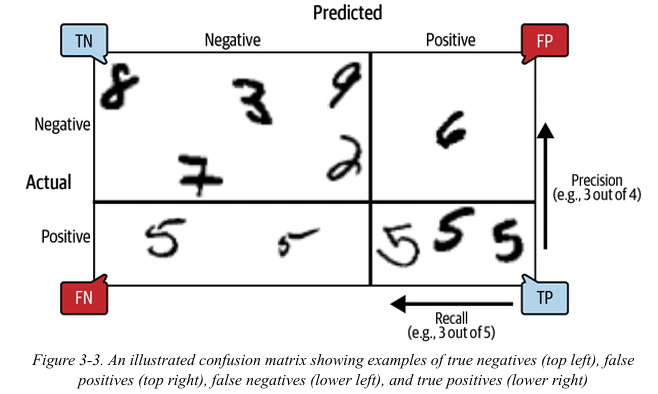

In [13]:
precision_score(y_train_5, y_train_pred)

0.8370879772350012

In [14]:
recall_score(y_train_5, y_train_pred)

0.6511713705958311

- Now the 5 detector does not look as shiny as it did when we looked at the accuracy
- When it claims an image represents a 5, it is correct only 83.7 % of the time. Moreover it only detects 65.1 % of the 5s!

In [15]:
f1_score(y_train_5, y_train_pred)

0.7325171197343847

### Precision/Recall Trade-Off
- The diagram below corresponds to the SGD Classifier which trains a decision function. This decision function computes a score for each instance and if this instance greater than a threshold, it assigns the instance to the positive class, otherwise it assigns the instance of the negative class.
- We can raise this threshold only manually by acessing the decision function 
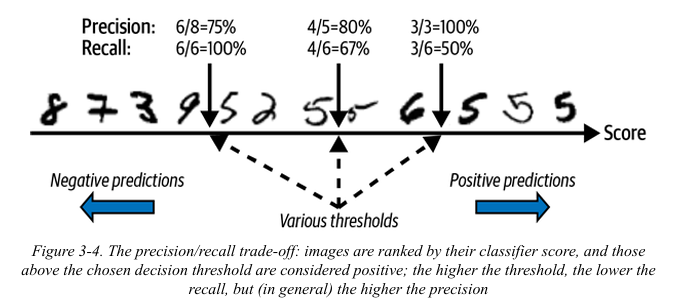

In [16]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

print(y_scores > 0) # default threshold
print(y_scores > 3000)

[ True]
[False]


In [17]:
y_scores                        = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

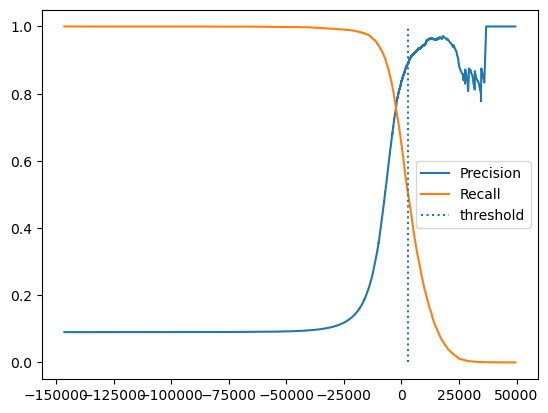

In [21]:
fig = plt.figure()
ax  = fig.add_subplot()
ax.plot(thresholds, precisions[:-1], label='Precision')
ax.plot(thresholds, recalls[:-1], label='Recall')
ax.vlines(3000, 0, 1.0, ls="dotted", label='threshold')
ax.legend()

In [ ]:
fig = plt.figure()
ax  = fig.add_subplot()
ax.plot(recalls, precisions)

In [ ]:
idx_for_90_precision        = (precisions >= 0.90).argmax()
threshold_for_90_precision  = thresholds[idx_for_90_precision]